# Exercise 1.2
---

### Exercise 1

> (a) Read in the signal $f(t)$ (file signal.dat) and perform a discrete convolution with a (normalized and discrete) Gaussian function
$$
g(t) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{t^2}{2\sigma^2}}\, .
$$
Here $\sigma$ denotes the standard deviation.
Plot the original signal  $f(t)$ and the convolved signal $f(t)\ast g(t)$ in a common graph.
 Use the follwing python commands:
- https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.signal.gaussian.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html or
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

> (b) Consider the signal f(t) (T=10) of the form
$$
f(t) = \begin{cases} 1 & t\in[0,3] \\ -1 & t\in (3,5] \\ 3 & t\in (5,7]\\  7 & t\in (7,10] \end{cases}
$$
and sample it with $f_s=100$. (You may use https://docs.scipy.org/doc/numpy/reference/generated/numpy.piecewise.html to generate this signal). Convolve this signal with the Gaussian function $g(t)$ from part (a). What is the effect when you vary the standard deviation of the Gaussian?

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import gaussian, convolve
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

##########
# Part (a)
##########

f = np.loadtxt('signal.dat',delimiter=',')

def plot_signal(s):
    plt.figure(figsize=(14,4))
    g = gaussian(100, s)
    g /=np.sum(g)
    print(np.sum(g))
    plt.subplot(1,2,2)
    plt.plot(g)
    plt.axis([0,100,0,0.35])
    plt.grid()
    plt.subplot(1,2,1)
    plt.plot(f)
    plt.plot(convolve(f, g, mode='same'))
    plt.grid()
    
interact(plot_signal,s=widgets.IntSlider(min=1, max=50, step=1, value=1))

interactive(children=(IntSlider(value=1, description='s', max=50, min=1), Output()), _dom_classes=('widget-int…

<function __main__.plot_signal(s)>

In [6]:
##########
# Part (b)
##########

T, fs = 10, 100
N=fs*T
t, freq =np.linspace(0,10,N), np.arange(-fs/2,fs/2,1/T)
f = np.piecewise(t,[t>0, t>3, t>5 ,t>7],[1,-1,3,7])

def plot_signal(s):
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    plt.plot(t,f,'r')
    plt.title('Signal')
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(t[:100],gaussian(100,s)/np.sum(gaussian(100,s)))
    plt.grid()
    f_conv = convolve(f,gaussian(100,s)/np.sum(gaussian(100,s)),mode='same')
    plt.subplot(1,2,1)
    plt.plot(t,f_conv)


interact(plot_signal,s=widgets.IntSlider(min=1, max=20, step=1, value=10))

interactive(children=(IntSlider(value=10, description='s', max=20, min=1), Output()), _dom_classes=('widget-in…

<function __main__.plot_signal(s)>

### Exercise 2

> (a) Write a python function my\_conv2d(A,B) for a 2D-convolution for two matrices $\mathbf{A}$ and $\mathbf{B}$ according to
$$
\mathbf{C} = \mathbf{A}\ast \mathbf{B}\quad \mathrm{with}\quad
c_{ij} = \sum_{k,l}a_{k,l}b_{i-k,l-j}
$$

>(b) Test your function with the image Lena.png
and a 2D Gaussian kernel $g(x,y)$ of the form
$$
g(x,y) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x^2+y^2)}{2\sigma^2}}\,.
$$
Generate this function by hand: Use a window-size $(x,y)\in [-10,10]$ with stepsize one.
Don't forget to properly normalize your Gaussian window.

>(c) Compare your result when convolving with the built-in function convolve2d from
scipy.signal: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)

In [8]:
def my_conv(A,B):
    A_m, A_n = A.shape # 512, 512
    B_m, B_n = B.shape # 20, 20
    I_c = np.zeros((A_m-B_m,A_n-B_n))
    for i in range(A_m-B_m):
        for j in range(A_n-B_n):
            I_c[i,j]  = np.sum(A[i:i+B_m,j:j+B_n]*B)
    return I_c

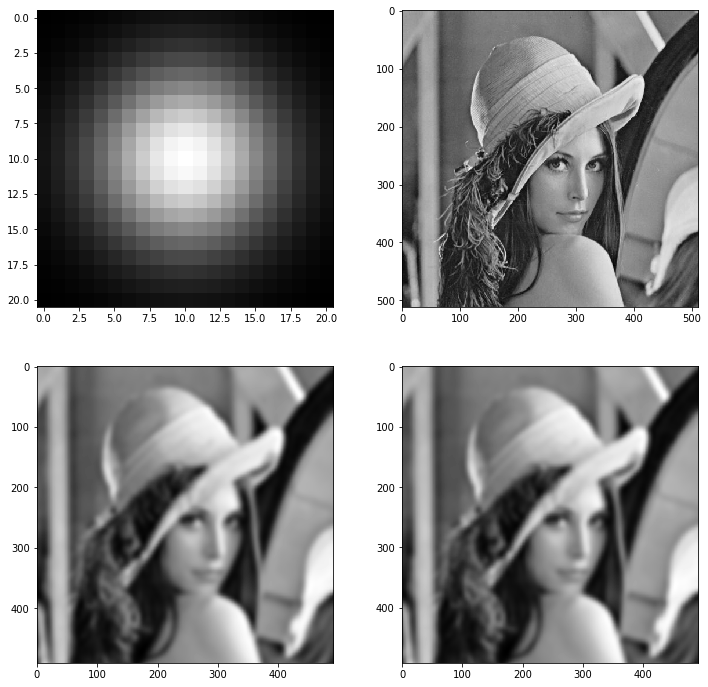

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

plt.figure(figsize=(12,12))
N = 10
s = 40
x,y = np.meshgrid(np.arange(-N,N+1,1),np.arange(-N,N+1,1))
g = np.exp(-(x**2+y**2)/s)
g = g/np.sum(g)
plt.subplot(2,2,1)
plt.imshow(g,cmap='gray')

I = plt.imread('Lena.png')
plt.subplot(2,2,2)
plt.imshow(I,cmap='gray')

I_c = my_conv(I,g)
plt.subplot(2,2,3)
plt.imshow(I_c,cmap='gray')

plt.subplot(2,2,4)
plt.imshow(convolve2d(I, g, mode='valid'),cmap='gray')

### Exercise 3

> Consider the electric circuit as shown in the figure below

<img src="circuit.png" height="100" width="500"/>

> (a) Find the corresponding differential equation in the time domain, i.e. the coefficients in
$$
\left(a_n\frac{\mathrm{d}^n}{\mathrm{dt}^n} + 
a_{n-1}\frac{\mathrm{d}^{n-1}}{\mathrm{dt}^{n-1}} + 
a_1\frac{\mathrm{d}}{\mathrm{dt}}
+ a_0 \right)U_o(t) = 
\left(b_m\frac{\mathrm{d}^m}{\mathrm{dt}^m} + 
a_{m-1}\frac{\mathrm{d}^{m-1}}{\mathrm{dt}^{m-1}} + 
b_1\frac{\mathrm{d}}{\mathrm{dt}}
+ b_0 \right)
U_i(t)
$$
Your result should read:
$$
\left(LC\frac{\mathrm{d}^2}{\mathrm{d}t^2}+ \frac{L}{R}\frac{\mathrm{d}}{\mathrm{d}t} + 1\right) U_o(t) = U_i(t)
$$

> (b) Find the complex transfer function $H(\omega)$. Your result should read:
$$
H(\omega) = \frac{1}{-LC\omega^2+i\frac{L}{R}\omega +1}
$$

> (c) Plot both $|H(\omega)|$ and $\varphi(\omega)$ for $\omega>0$

In [ ]:
################
# Your code here
################
w = np.linspace(0,2000,100000)
L = 10**(-3)
C = 10**(-3)
R = 100

H = 1/(-L*C*w**2+1j*L/R*w+1)
print(H)
plt.plot(w,np.abs(H))
plt.xlabel('w')
plt.ylabel('|H(w)|')
plt.grid()
plt.show()

plt.plot(w,np.angle(H))
plt.grid()
plt.xlabel('w')
plt.ylabel('phi(w)')
plt.show()

In [ ]:
w = 2000
t = np.linspace(0,2*np.pi/w*3,10000)
plt.plot(t,np.exp(1j*w*t))
H = 1/(-L*C*w**2+1j*L/R*w+1)
print(H)
plt.plot(t,H*np.exp(1j*w*t))

### Exercise 4

> Consider a simple math-spring-system (mass $m$, spring constant $k$, coefficient of friction $\gamma$), which is excited by an external force $F(t)$ (see for example: https://www.av.ph.tum.de/Experiment/1000/Animation/1605/resonanz.php) 
- Use Newtons second law (principle of action) 
$$
F(t) = m\ddot{x}(t)
$$
to determine the equation of motion.
- Determine the complex transfer function $H(\omega)$.
- Plot $|H(\omega)|$ and $\varphi(\omega)$ in two different plots for a few values of $\gamma$.
- Determine the Impulse response function h(t) via the inverse Fourier transform. Use
$$
f(t) = \theta(t)e^{-\beta t}\sin(\alpha t) \quad \Leftrightarrow \quad F(\omega) = \frac{\alpha}{(\beta+i\omega)^2+\alpha^2}\, .
$$
Plot f(t).

In [ ]:
################
# Your code here
################
m = 1 # Masse
D = 10 # Federkonstante
g = [0.05,0.1,0.2,0.4]

w_0 = np.sqrt(D/m)
w = np.linspace(0,10,1000)
for g in g:
    H = 1/(-w**2+1j*g/m*w+w_0**2)
    plt.plot(w,np.abs(H),label='g = {}'.format(g))

plt.grid()
plt.legend()

plt.axis([0,10,0,4])